## gwEccEvNS : a simple fun model for eccentricity evolution in time domain for non-spinning binaries
Presented by Islam and Venumadhav (https://arxiv.org/abs/2502.02739)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import timeit
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")

# Add the path to the parent directory with the gwmodeler code
sys.path.append("../../gwModels/")
import gwModels

lal.MSUN_SI != Msun
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
Loaded NRHybSur3dq8 model


### Example evolution

In [2]:
# load eccentric NR data from SXS:BBH:1355 and circular NR data from SXS:BBH:0180
wfs = np.load('SXSBBH1355.npy', allow_pickle=True)[()]

t_ecc = wfs['t_ecc'] 
hecc_dict = wfs['hecc_dict'] 
t_cir = wfs['t_cir'] 
hcir_dict = wfs['hcir_dict']

# compute eccentricity from waveform data
obj = gwModels.ecc_measures.ComputeEccentricity(t_ecc = t_ecc,
                                                h_ecc_dict = {'h_l2m2': hecc_dict['h_l2m2']},
                                                t_cir = t_cir,
                                                h_cir_dict = {'h_l2m2': hcir_dict['h_l2m2']},
                                                q=1, 
                                                distance_btw_peaks=2000, # choice for the distance between peak
                                                fit_funcs_orders=['3PN_m1over8', '3PN_m1over8'], # default choices for the fit orders using PN+pseudo PN expressions
                                                ecc_prefactor=2/3) # default choice for the Newtonian limit

# calculate eccentricity from gwEccEvNS model using q
et_model = gwModels.models.gwEccEvNS_model(t=obj.time_xi, 
                                           q=1, 
                                           e0=obj.ecc_xi[0])

... gwModels eccentricity at t_ref=-2638.56 : 0.07996


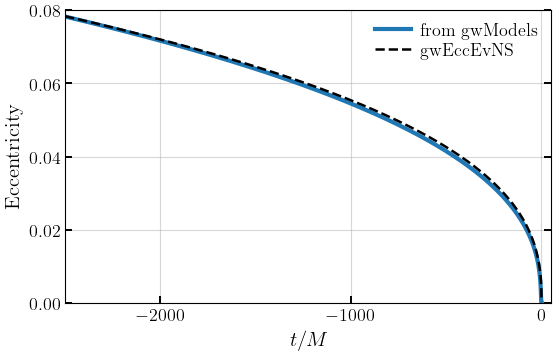

In [3]:
plt.figure(figsize=(6,4))
plt.plot(obj.time_xi, obj.ecc_xi, c='C0', lw=3, label='from gwModels')
plt.plot(obj.time_xi, et_model, c='k', ls='--', label='$\\rm gwEccEvNS$')
plt.xlabel('$t/M$', fontsize=15)
plt.ylabel('$\\rm Eccentricity$', fontsize=15)
plt.ylim(0.00,0.08)
plt.xlim(xmin=-2500,xmax=50)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=13, frameon=False)
plt.tight_layout()
plt.show()